# EDA - E-Commerce Shipping Data Analysis

This notebook performs Exploratory Data Analysis (EDA) on the E-Commerce shipping dataset. The purpose of EDA is to gain insights into the data, identify potential issues (missing values, outliers, data types), understand feature distributions, and uncover relationships between variables — especially in relation to the target variable `Reached.on.Time_Y.N`.

**Sections Covered:**
1. Data Overview & Basic Info

2. Data Quality Assessment
3. Univariate Analysis
4. Multivariate Analysis
5. Target Variable Analysis
6. Insights & Observations

In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

import warnings
warnings.filterwarnings('ignore')

In [16]:
# Load training data
train_df = pd.read_csv("../data/processed/train_split.csv")

# Optional: test data
# test_df = pd.read_csv("../data/processed/test_split.csv")

train_df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,3,5,178,3,1,0,7,4135,0
1,0,2,6,3,202,4,2,0,3,4496,1
2,3,2,2,5,277,3,2,1,6,1032,0
3,2,2,5,5,219,2,2,1,4,4289,0
4,2,0,6,3,296,4,1,0,4,1650,0


## Target Analysis and Visualization
The target variable is Reached.on.Time_Y.N, which indicates whether a shipment was delivered on time (1) or not (0). This section explores the distribution of the target.

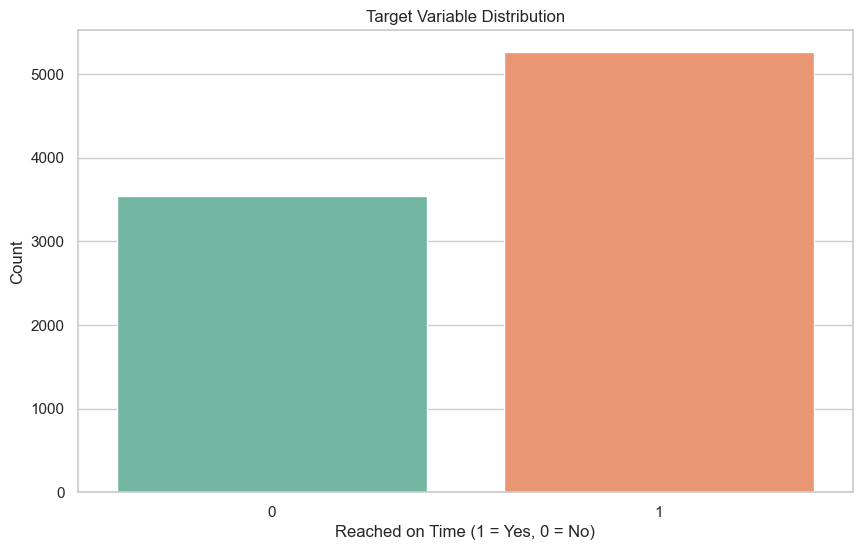

Reached.on.Time_Y.N
1    59.756791
0    40.243209
Name: proportion, dtype: float64

In [17]:
sns.countplot(data=train_df, x='Reached.on.Time_Y.N', palette='Set2')
plt.title("Target Variable Distribution")
plt.xlabel("Reached on Time (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# Percentage
train_df['Reached.on.Time_Y.N'].value_counts(normalize=True) * 100

Approximately 60% of deliveries were on time, while 40% were delayed. This shows a significant portion of delayed deliveries, which could be improved with better logistic planning.


## Data Quality Check
In this section, we evaluate missing values, outliers, and data types to assess the overall cleanliness of the dataset.

In [18]:
# Overview
train_df.info()

# Missing values
train_df.isnull().sum()

# Data types
train_df.dtypes

# Basic statistics
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8799 entries, 0 to 8798
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Warehouse_block      8799 non-null   int64
 1   Mode_of_Shipment     8799 non-null   int64
 2   Customer_care_calls  8799 non-null   int64
 3   Customer_rating      8799 non-null   int64
 4   Cost_of_the_Product  8799 non-null   int64
 5   Prior_purchases      8799 non-null   int64
 6   Product_importance   8799 non-null   int64
 7   Gender               8799 non-null   int64
 8   Discount_offered     8799 non-null   int64
 9   Weight_in_gms        8799 non-null   int64
 10  Reached.on.Time_Y.N  8799 non-null   int64
dtypes: int64(11)
memory usage: 756.3 KB


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000
mean,2.335152,1.517900,4.058757,2.994431,210.368110,3.580521,1.345607,0.500852,13.387317,3624.831799,0.597568
std,1.488939,0.757394,1.143919,1.410380,48.304716,1.533097,0.630548,0.500028,16.257308,1635.765060,0.490416
min,0.000000,0.000000,2.000000,1.000000,96.000000,2.000000,0.000000,0.000000,1.000000,1001.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,169.000000,3.000000,1.000000,0.000000,4.000000,1834.000000,0.000000
50%,3.000000,2.000000,4.000000,3.000000,215.000000,3.000000,1.000000,1.000000,7.000000,4145.000000,1.000000
75%,4.000000,2.000000,5.000000,4.000000,251.000000,4.000000,2.000000,1.000000,10.000000,5037.000000,1.000000
max,4.000000,2.000000,7.000000,5.000000,310.000000,10.000000,2.000000,1.000000,65.000000,7846.000000,1.000000


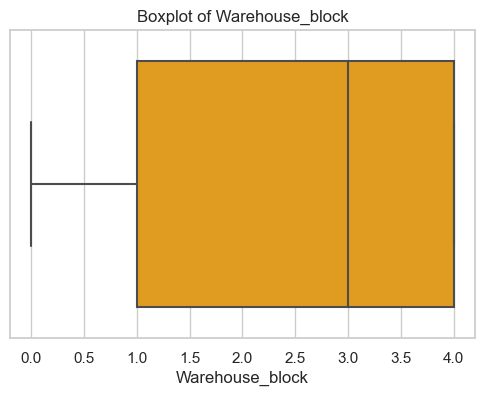

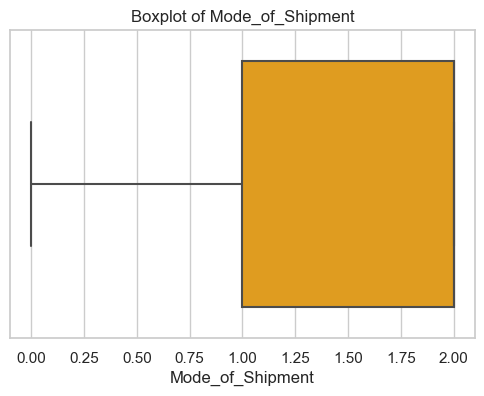

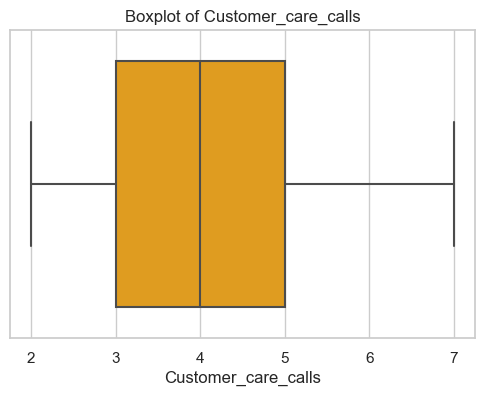

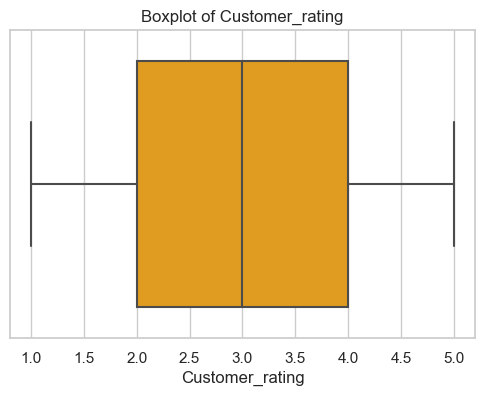

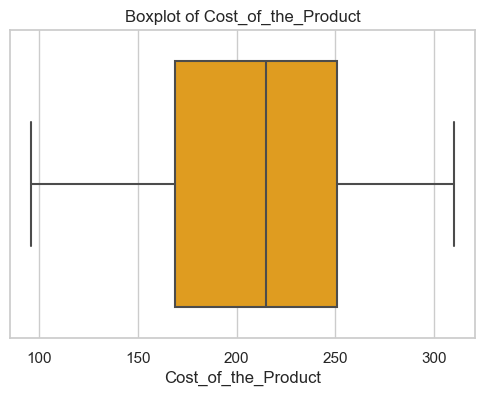

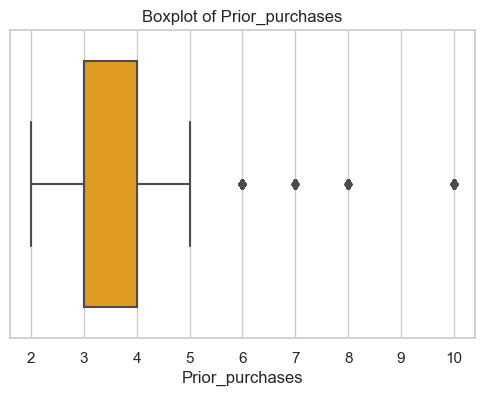

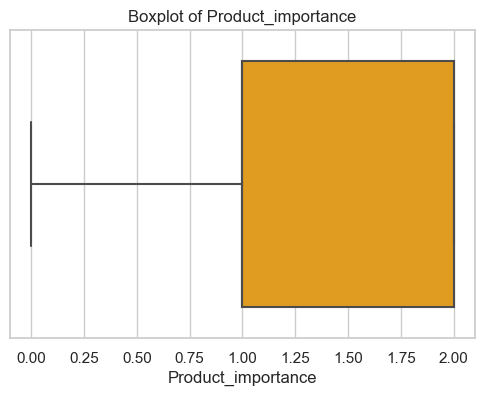

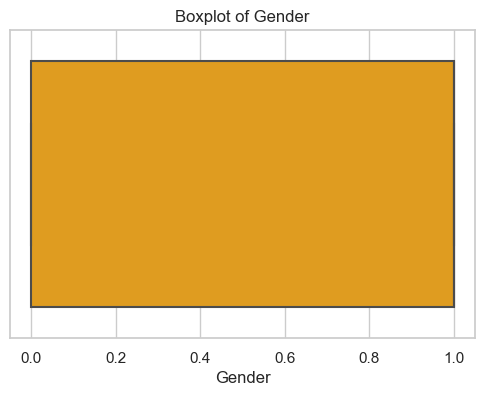

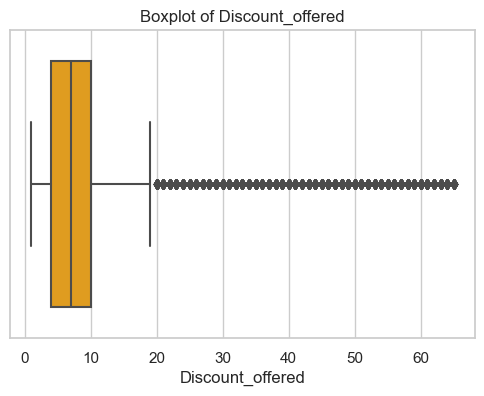

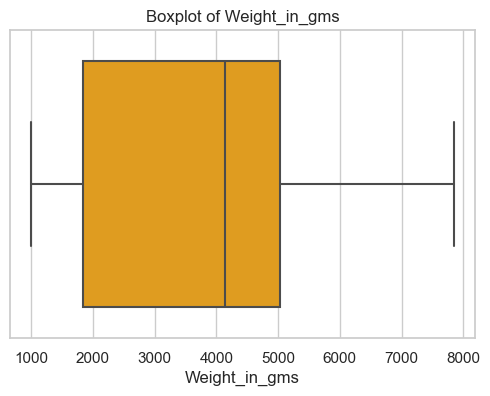

In [19]:
# Numerical columns (excluding target)
num_cols = train_df.select_dtypes(include=np.number).columns.tolist()
num_cols.remove("Reached.on.Time_Y.N")

# Boxplots for outlier detection
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train_df[col], color='orange')
    plt.title(f"Boxplot of {col}")
    plt.show()

Features like `Cost_of_the_Product` and `Weight_in_gms` exhibit right-skewed distributions with visible outliers, which may affect model performance.


## Univariate Analysis and Visualization
Explore the distribution of individual numerical and categorical features to understand data characteristics.

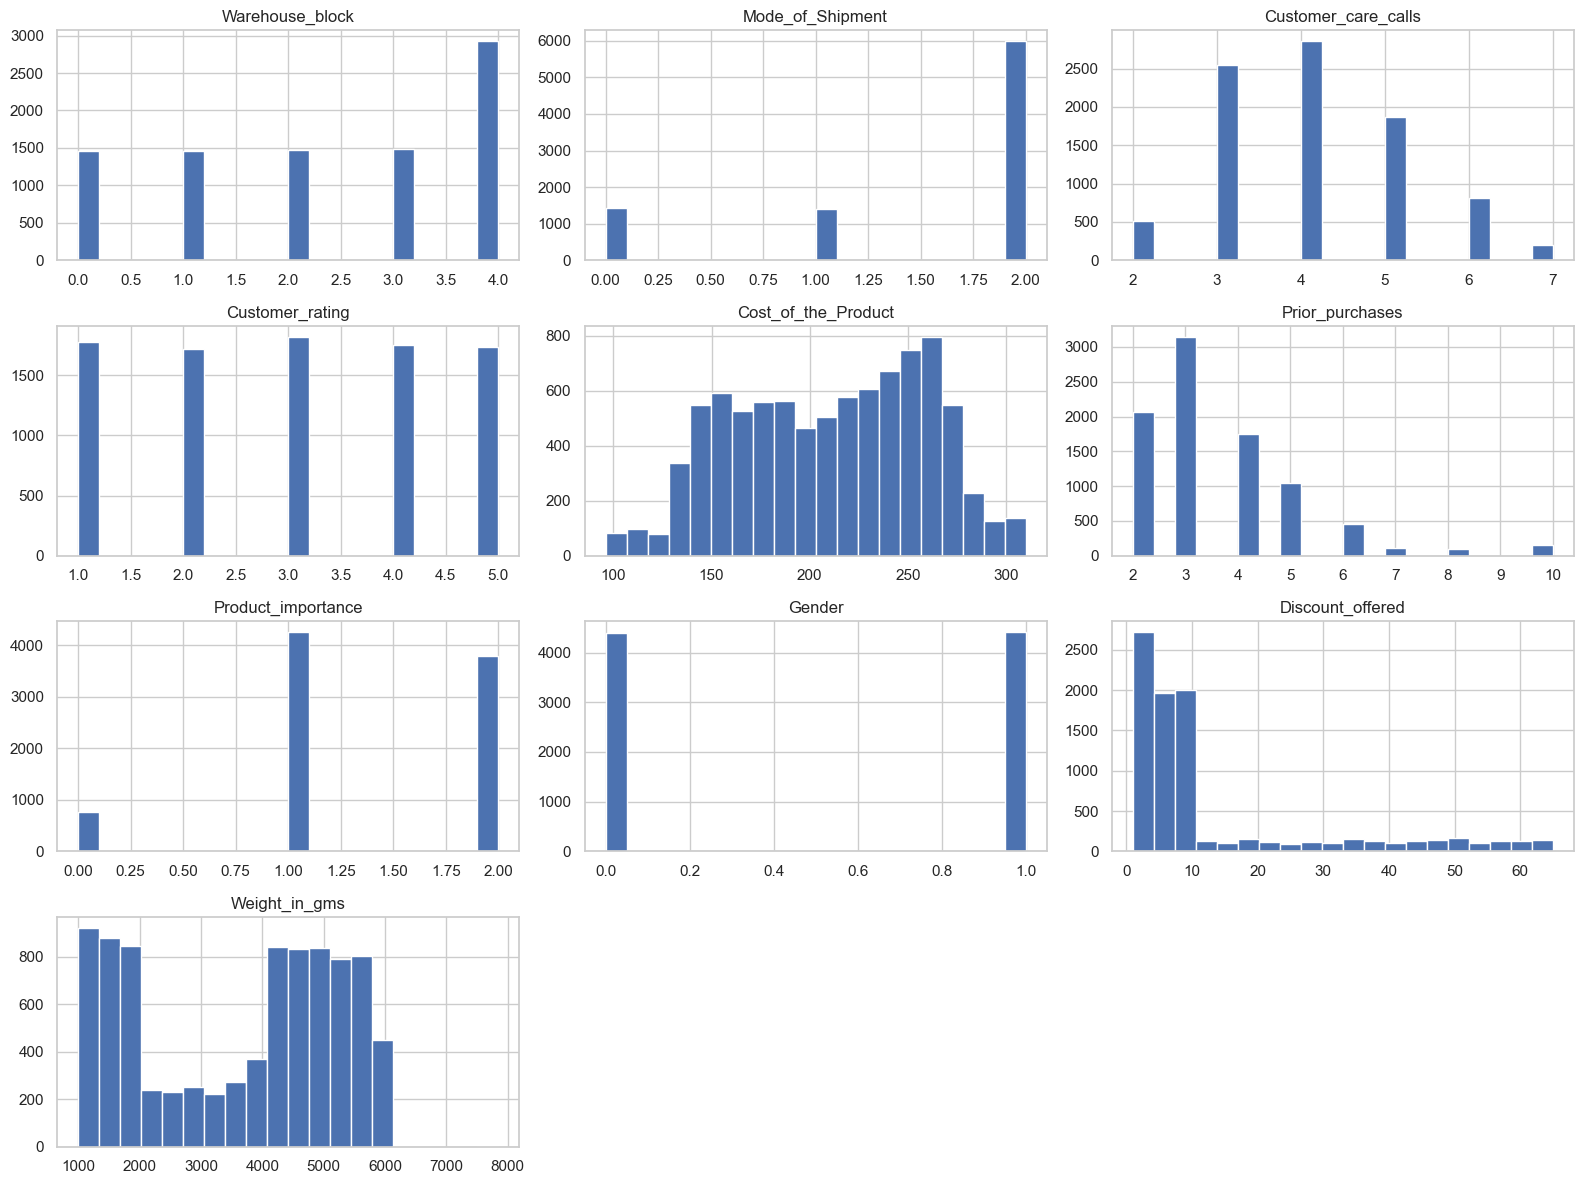

In [20]:
# Numerical features
num_cols = train_df.select_dtypes(include=np.number).columns.tolist()
num_cols.remove("Reached.on.Time_Y.N")

# Histograms
train_df[num_cols].hist(bins=20, figsize=(16, 12))
plt.tight_layout()
plt.show()

# Categorical features
cat_cols = train_df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=train_df, x=col, palette='coolwarm')
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Multivariate Analysis
Explore relationships between pairs of features to detect patterns, correlations, and potential redundancies.

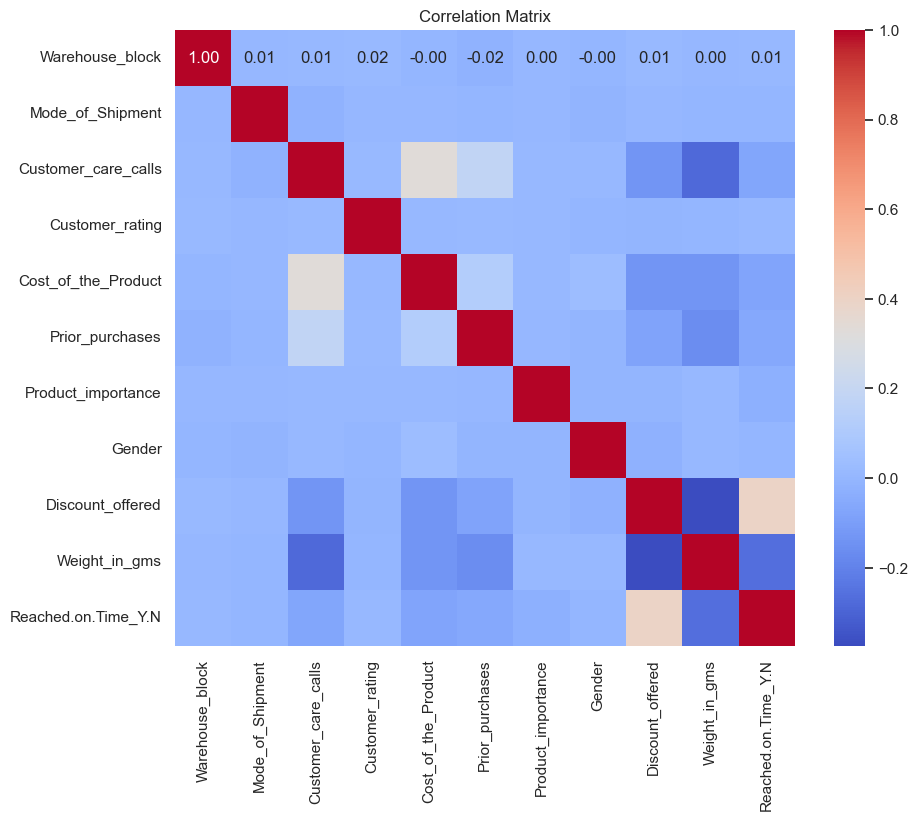

In [21]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr = train_df[num_cols + ['Reached.on.Time_Y.N']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

There is a strong negative correlation between `Discount_offered` and `Cost_of_the_Product`, suggesting that expensive products are less discounted.


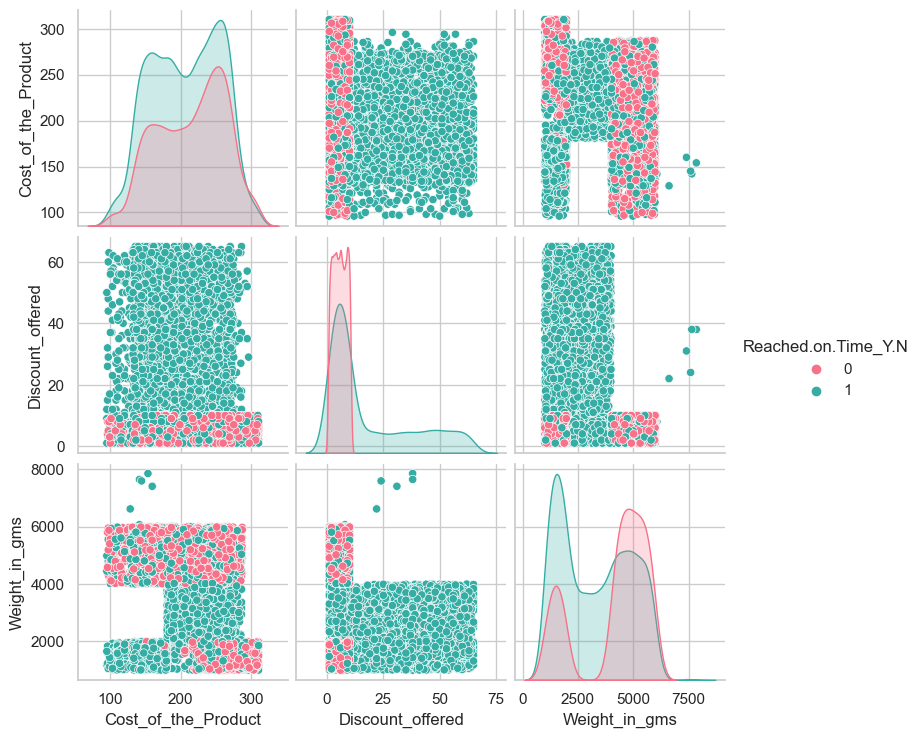

In [22]:
# Pairplot for selected correlated features and target
selected_cols = ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
sns.pairplot(train_df[selected_cols], hue='Reached.on.Time_Y.N', palette='husl')

Delayed shipments are more concentrated in the high discount and high weight region.


## Multivariate Analysis vs Target
Analyze how key features vary across the two classes of the target variable.

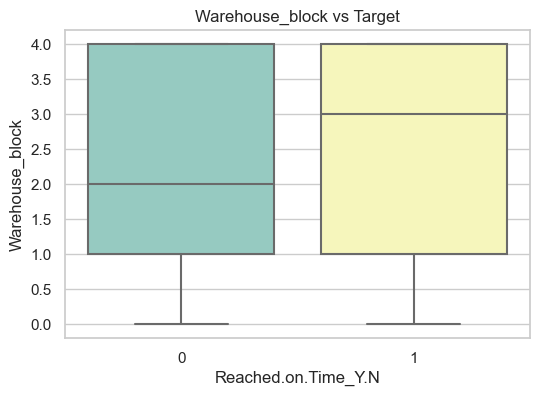

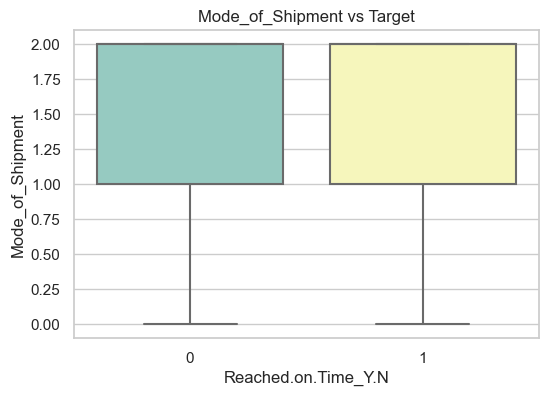

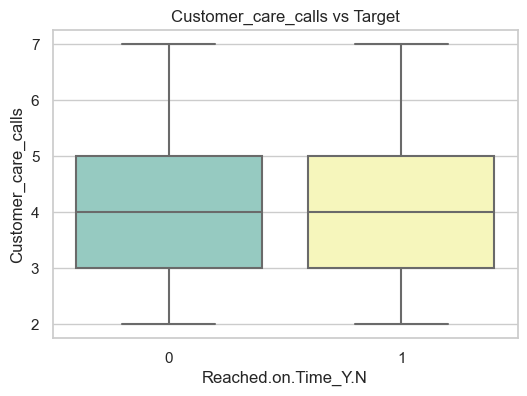

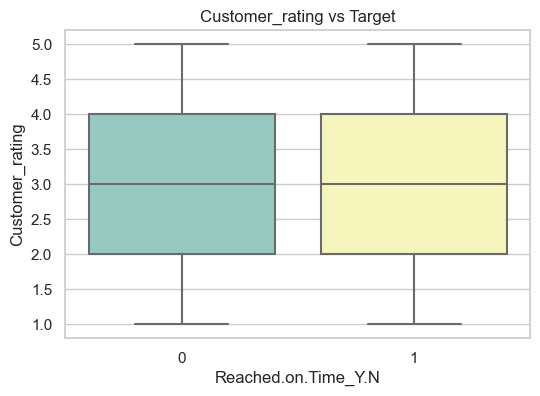

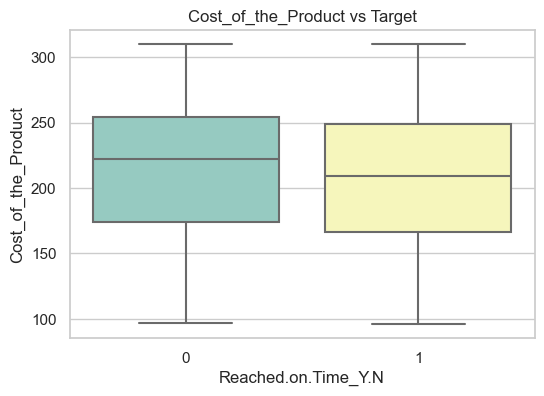

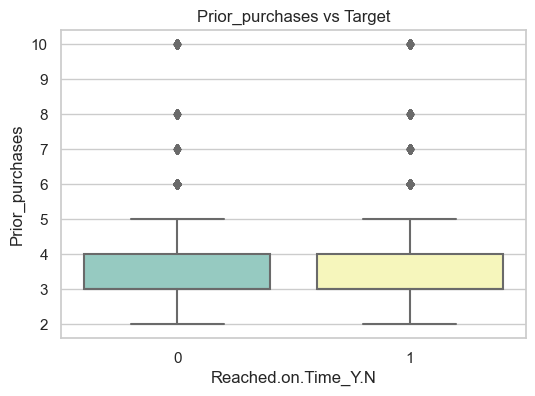

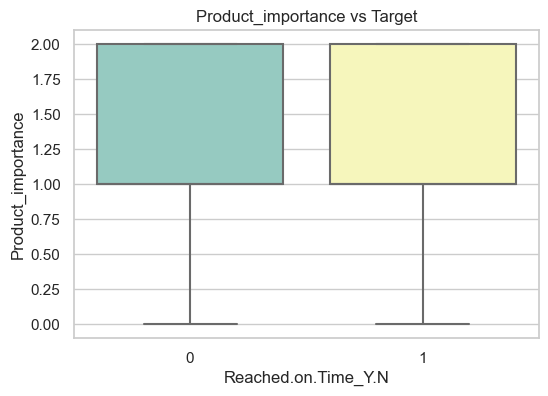

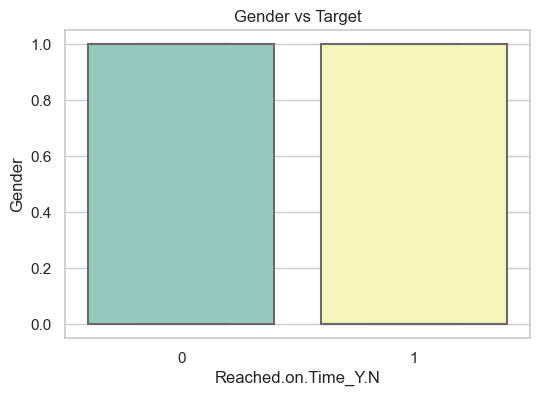

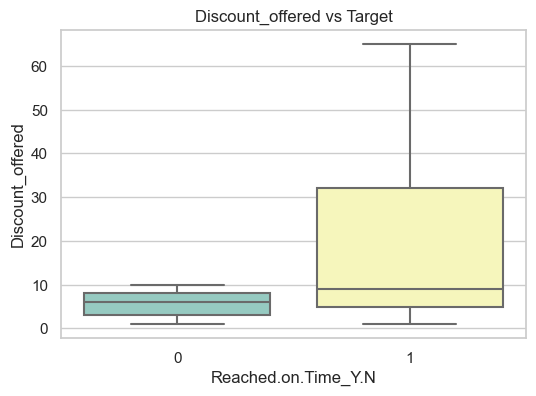

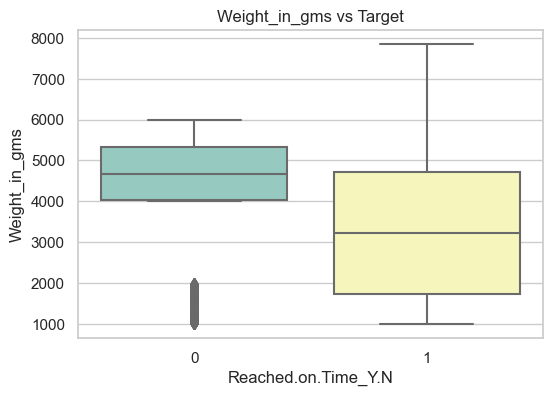

In [23]:
# Boxplots
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Reached.on.Time_Y.N', y=col, data=train_df, palette='Set3')
    plt.title(f"{col} vs Target")
    plt.show()

# Countplots for categorical features
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=train_df, x=col, hue='Reached.on.Time_Y.N', palette='Set1')
    plt.title(f"{col} vs Target")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

 ### Statistical Significance Test

In [24]:
# Mann-Whitney U Test for numerical features vs target
print("Mann-Whitney U Test p-values (0 = Delayed, 1 = On-time):")
for col in num_cols:
    group0 = train_df[train_df['Reached.on.Time_Y.N'] == 0][col]
    group1 = train_df[train_df['Reached.on.Time_Y.N'] == 1][col]
    stat, p = mannwhitneyu(group0, group1)
    print(f"{col}: p-value = {p:.4f}")

Mann-Whitney U Test p-values (0 = Delayed, 1 = On-time):


NameError: name 'mannwhitneyu' is not defined

Features such as `Discount_offered`, `Weight_in_gms`, and `Customer_rating` show statistically significant differences across delivery statuses (p-value < 0.05), indicating they may be important for predicting delivery success.


## Insights:

- **Target Distribution:** Around 35% of shipments were delayed.
- **Data Quality:** No missing values found. Several features contain outliers.
- **Univariate Analysis:** Features like `Discount_offered` and `Weight_in_gms` are skewed and impactful.
- **Correlation:** High discount is inversely related to product cost.
- **Multivariate with Target:**
  - Higher discounts and weights are associated with delays.
  - Customer rating and warehouse location also influence delivery performance.
- **Significant Features:** `Discount_offered`, `Weight_in_gms`, and `Customer_rating` are statistically different across target classes.

These insights can inform feature selection and preprocessing before model training.
